# Setting up the environment Gymnasium

In [1]:
! pip install gymnasium
! pip install gymnasium[classic-control]

  Using cached gymnasium-1.1.1-py3-none-any.whl.metadata (9.4 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl.metadata (558 bytes)
Using cached gymnasium-1.1.1-py3-none-any.whl (965 kB)
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)
Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
  Using cached pygame-2.6.1-cp310-cp310-win_amd64.whl.metadata (13 kB)
Using cached pygame-2.6.1-cp310-cp310-win_amd64.whl (10.6 MB)


In [7]:
! pip install imageio

  Using cached imageio-2.37.0-py3-none-any.whl.metadata (5.2 kB)
Using cached imageio-2.37.0-py3-none-any.whl (315 kB)


In [17]:
! pip install stable_baselines3

  Using cached stable_baselines3-2.6.0-py3-none-any.whl.metadata (4.8 kB)
Using cached stable_baselines3-2.6.0-py3-none-any.whl (184 kB)


In [8]:
import gymnasium as gym

# list all available environments
envs = gym.envs.registry.keys()
print(list(envs))

['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'phys2d/CartPole-v0', 'phys2d/CartPole-v1', 'phys2d/Pendulum-v0', 'LunarLander-v3', 'LunarLanderContinuous-v3', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v3', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'tabular/Blackjack-v0', 'tabular/CliffWalking-v0', 'Reacher-v2', 'Reacher-v4', 'Reacher-v5', 'Pusher-v2', 'Pusher-v4', 'Pusher-v5', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedPendulum-v5', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'InvertedDoublePendulum-v5', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'HalfCheetah-v5', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Hopper-v5', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Swimmer-v5', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Walker2d-v5', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Ant-v5', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'Humanoid-v5', 'Humano

# Learning Objectives
* Apply Reinforcement Learning Concepts
* Understanding gymnasium environments
* Demonstrate Q-Learning and Deep Q-Learning Reinforcement techniques

# Real Life Applications
* Autonomous Vehicles
* Automated Stock Trading



# The Cartpole Environment
The environment consists of:
* A cart that moves left or right on a track
* A pole attached to the cart that tries to stay upright.
* The agent's goal is to prevent the pole from falling over by choosing the right actions.


# The Agent's Role
* Observes the environment (the current state of the cart and pole).
* Chooses an action based on the observation
* Receives rewards depending on how well it keeps the pole upright.
* Learns over time to improve its actions.

# Observation Space (State)

The agent sees the environment through observations represented as a 4D vector

|Feature|Description|
|---|---|
|Cart Position| How far left/right the cart is on the track.|
|Cart Velocity| Speed and direction of the cart|
|Pole Angle| How far the pole is tilted from the vertical|
|Pole Angular Velocity|How fast the pole is falling over.|

# Action Space
The agent  can take two discrete actions:
* 0: Move the cart left
* 1: Move the cart right

# Reward System (Learning Signal):
* The agent gets a reward of +1 for every time step the pole stays upright.
* If the pole falls past a threshold angle or the cart moves too far lef/right, the episode ends.

Goal: Maximize total rewards by keeping the pole balanced for as long as possible.

# Understanding the API
* env.reset(): Resets the environment and returns the initial observation.
* env.step(action): Applies an action and returns:
* obs: New state
* reward: Reward for this action
* done: Whether the episode is over
* truncated: If the episode ended for another * reason (e.g., max steps reached)
* info: Additional debugging info
* env.close(): Closes the environment.

In [9]:
# Create the environment
env = gym.make("CartPole-v1", render_mode="human")

# Reset environment to get the initial observation
obs, info = env.reset()

# Take action in the environment

action=env.action_space.sample() # Choose a random action
obs, reward, done, truncated, info = env.step(action)

print(f"New State: {obs}, Reward: {reward}, Done: {done}")

env.close()



New State: [-0.00112936 -0.24573727  0.05035486  0.33876374], Reward: 1.0, Done: False


In [10]:
obs

array([-0.00112936, -0.24573727,  0.05035486,  0.33876374], dtype=float32)

In [11]:
info

{}

# What is an episode?

In reinforcement learning, an episode consists of multiple steps, and at each step, the agent takes one action based on the current state.

Each episode starts when the environment is reset and ends when:

The agent reaches a terminal state (e.g., the pole falls in CartPole).
A maximum number of steps is reached (if specified).
The episode is truncated due to environment constraints

# Walking through a Random Selected Action

Action 
Action 
Action 
Action 
Action 
Action 
Action 
Action 
Action 
Action 
Action 


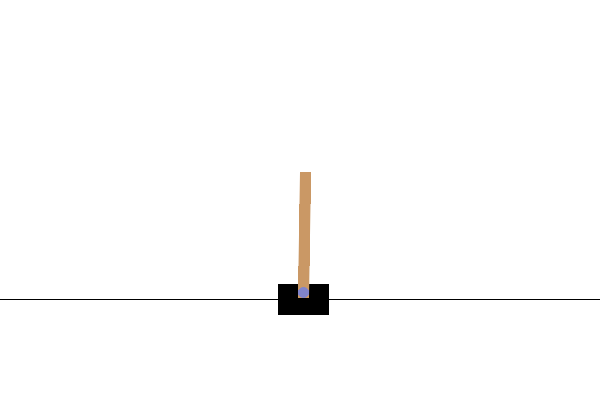

In [12]:
import gymnasium as gym
import imageio # used to save and create a GIF from the frames of the simulation.


# Create environment
# Instead of rendering in a window (which may not work in some environments like Colab), it captures frames as images (NumPy arrays)
env = gym.make("CartPole-v1", render_mode="rgb_array")

frames = []  # A list to store images (frames) of the simulation for making a GIF later.

# Resets the environment to the initial state. _ is used because reset() returns two values, but we only need state.
state, _ = env.reset()
done = False # Tracks whether episode ended

while not done: # loop until cart pole falls
    print("Action ")
    # Selects a random action (0 for left, 1 for right).
    action = env.action_space.sample()


    # Executes the selected action in the environment.
    #   Returns:
    #     state: The new state after taking the action.
    #     reward: The reward received (always +1 for each step in CartPole).
    #     done: True if the episode ends (CartPole falls).
    #     truncated: Indicates if the episode was forcibly stopped (not relevant here).
    #     info: Extra information (not used here).

    state, reward, done, truncated, info = env.step(action)

    # Capture frame
    frames.append(env.render())

# Save as a GIF
imageio.mimsave(' cartpole.gif', frames, duration=0.1)

# Display in Colab
from IPython.display import Image
Image(filename='cartpole.gif')


# Tracking the average steps before failure using a Random Model

In [27]:
import gymnasium as gym
import numpy as np
import time
from IPython.display import clear_output

# Create environment
env = gym.make("CartPole-v1",  render_mode="rgb_array")  # No rendering for faster execution

num_episodes = 500  # Number of episodes to test
random_steps = []  # List to store steps per episode

for episode in range(1, num_episodes + 1):
    state, _ = env.reset()
    done = False
    step_count = 0

    while not done:
        action = env.action_space.sample()  # Random action
        state, reward, done, truncated, info = env.step(action)
        step_count += 1  # Track steps

    random_steps.append(step_count)
    print(f"🎲 Random Model - Episode {episode}: {step_count} steps")

env.close()

# Print statistics
print("\n📊 Random Model Performance:")
print(f"Avg Steps: {np.mean(random_steps):.2f}")
print(f"Min Steps: {np.min(random_steps)}")
print(f"Max Steps: {np.max(random_steps)}")


🎲 Random Model - Episode 1: 12 steps
🎲 Random Model - Episode 2: 32 steps
🎲 Random Model - Episode 3: 10 steps
🎲 Random Model - Episode 4: 21 steps
🎲 Random Model - Episode 5: 38 steps
🎲 Random Model - Episode 6: 11 steps
🎲 Random Model - Episode 7: 23 steps
🎲 Random Model - Episode 8: 39 steps
🎲 Random Model - Episode 9: 14 steps
🎲 Random Model - Episode 10: 32 steps
🎲 Random Model - Episode 11: 18 steps
🎲 Random Model - Episode 12: 10 steps
🎲 Random Model - Episode 13: 29 steps
🎲 Random Model - Episode 14: 42 steps
🎲 Random Model - Episode 15: 17 steps
🎲 Random Model - Episode 16: 22 steps
🎲 Random Model - Episode 17: 11 steps
🎲 Random Model - Episode 18: 13 steps
🎲 Random Model - Episode 19: 26 steps
🎲 Random Model - Episode 20: 17 steps
🎲 Random Model - Episode 21: 12 steps
🎲 Random Model - Episode 22: 42 steps
🎲 Random Model - Episode 23: 27 steps
🎲 Random Model - Episode 24: 35 steps
🎲 Random Model - Episode 25: 11 steps
🎲 Random Model - Episode 26: 28 steps
🎲 Random Model - Epis

### **Q-Learning vs. Deep Q-Learning (DQN with MLP Policy)**
Both **Q-Learning** and **Deep Q-Learning (DQN)** are reinforcement learning methods that aim to solve problems using a **Q-value function**. However, they differ in how they approximate the Q-function.

---

## **1️⃣ Q-Learning:**
A **tabular method** where the Q-values for each state-action pair are stored in a table and updated iteratively.

### ✅ **Key Features:**
- **Uses a Q-table**: Stores the Q-values for each state-action pair.
- **Works well for small, discrete state spaces**.
- **Updates Q-values using the Bellman Equation**:


### 🏆 **Best for:**
- Small, discrete environments (e.g., GridWorld, FrozenLake, simple Markov Decision Processes).

---

## **2️⃣ Deep Q-Learning (DQN with MLP Policy):**
An **approximation-based method** that replaces the Q-table with a deep neural network (DNN) to estimate Q-values.

### ✅ **Key Features:**
- **Uses a deep neural network (MLP policy) instead of a Q-table**.
- **Handles high-dimensional, continuous state spaces** (e.g., image-based games).
- **Uses experience replay** to stabilize training.
- **Uses target networks** to avoid instability in learning.

### 🔧 **How It Works:**
1. **Neural Network (MLP) approximates the Q-function**:  
   Instead of storing \( Q(s, a) \) in a table, the network **predicts** the Q-value given an input state.
   
2. **Experience Replay**:  
   Stores past experiences **(s, a, r, s')** in a memory buffer and samples random batches to update the Q-network.

3. **Target Network**:  
   A separate copy of the Q-network is updated slowly to improve stability.

4. **Loss function (Mean Squared Error for TD loss):**  
  
### 🏆 **Best for:**
- **Large, continuous, and complex environments** (e.g., Atari games, robotic control).
- **Tasks where raw sensory input (images, complex states) is used**.

---

## **3️⃣ Key Differences**
| Feature | Q-Learning | Deep Q-Learning (DQN with MLP) |
|---------|-----------|--------------------------------|
| **Approach** | Table-based | Neural Network-based |
| **Handles Large State Spaces?** | ❌ No | ✅ Yes |
| **Memory Usage** | High (needs to store \( Q(s,a) \)) | Lower (only stores network weights) |
| **Generalization to Unseen States?** | ❌ No | ✅ Yes |
| **Works with Continuous Spaces?** | ❌ No | ✅ Yes (with modifications like DDPG) |
| **Exploration Strategy** | ε-greedy | ε-greedy + Experience Replay |
| **Training Stability** | High | Can be unstable (needs tricks like target networks) |




# Improve the results DQN (Deep Q Learning )



🚀 Stable-Baselines3 (SB3) is a Python library that provides pre-implemented reinforcement learning (RL) algorithms built on top of PyTorch. It makes it easy to train, evaluate, and deploy RL models with minimal effort.


In [18]:
import gymnasium as gym
from stable_baselines3 import DQN

# Create environment
env = gym.make("CartPole-v1")

# Train an agent using DQN
model = DQN("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=50)  # Train for 50k steps

# Save the trained model
model.save("cartpole_dqn")
print("✅ Training complete! Model saved.")


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
✅ Training complete! Model saved.


🧠 Trained Agent | 🔄 Step: 85


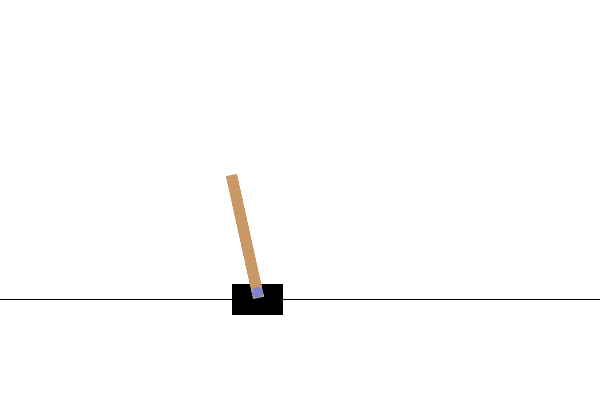

🎯 Trained Agent Balanced for 85 Steps! 🎉


In [19]:
import time
from IPython.display import display, clear_output
import PIL.Image

# Load trained model
model = DQN.load("cartpole_dqn")

# Create environment
env = gym.make("CartPole-v1", render_mode="rgb_array")

num_episodes = 1  # Number of training episodes
delay_per_step = 1  # Faster, since it's well-trained

for episode in range(1, num_episodes + 1):
    frames = []
    state, _ = env.reset()
    done = False
    step_count = 0

    print(f"🚀 Running Trained Model - Episode {episode}")

    while not done:
        action, _ = model.predict(state, deterministic=True)  # Use trained model
        state, reward, done, truncated, info = env.step(action)
        step_count += 1

        frame = env.render()
        frames.append(frame)

        clear_output(wait=True)
        print(f"🧠 Trained Agent | 🔄 Step: {step_count}")
        display(PIL.Image.fromarray(frame))

        time.sleep(delay_per_step)

    print(f"🎯 Trained Agent Balanced for {step_count} Steps! 🎉")


# Q-Learning for comparison



In [20]:
import gymnasium as gym
import numpy as np
import time
import random
from IPython.display import display, clear_output
import PIL.Image

# Create environment
env = gym.make("CartPole-v1", render_mode="rgb_array")

# Hyperparameters
num_bins = 20  # Number of bins to discretize continuous states
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Initial exploration rate
epsilon_min = 0.01  # Minimum exploration rate
epsilon_decay = 0.995  # Decay rate for exploration

num_episodes = 50_000  # Number of training episodes
max_steps_per_episode = 500  # Limit for each episode

# Discretization bins
state_bins = [
    np.linspace(-4.8, 4.8, num_bins),  # Cart Position
    np.linspace(-4, 4, num_bins),  # Cart Velocity
    np.linspace(-0.418, 0.418, num_bins),  # Pole Angle
    np.linspace(-4, 4, num_bins),  # Pole Velocity at Tip
]

# Q-table (20x20x20x20 states x 2 actions)
q_table = np.zeros((num_bins, num_bins, num_bins, num_bins, env.action_space.n))

# Function to convert continuous state into discrete bins
def discretize_state(state):
    indices = tuple(np.digitize(state[i], state_bins[i]) - 1 for i in range(len(state)))
    return indices

# Training loop
for episode in range(num_episodes):
    state, _ = env.reset()
    state = discretize_state(state)
    done = False
    total_reward = 0

    for step in range(max_steps_per_episode):
        # Choose action using epsilon-greedy policy
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[state])  # Exploit best known action

        next_state, reward, done, truncated, _ = env.step(action)
        next_state = discretize_state(next_state)

        # Update Q-value using the Bellman equation
        best_future_q = np.max(q_table[next_state])
        q_table[state + (action,)] = (1 - alpha) * q_table[state + (action,)] + alpha * (reward + gamma * best_future_q)

        state = next_state
        total_reward += reward

        if done:
            break

    # Decay exploration rate
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Print progress every 1000 episodes
    if episode % 1000 == 0:
        print(f"Episode {episode}: Total Reward = {total_reward}")

print("✅ Training complete! Q-table updated.")

Episode 0: Total Reward = 33.0
Episode 1000: Total Reward = 112.0
Episode 2000: Total Reward = 162.0
Episode 3000: Total Reward = 80.0
Episode 4000: Total Reward = 153.0
Episode 5000: Total Reward = 127.0
Episode 6000: Total Reward = 75.0
Episode 7000: Total Reward = 136.0
Episode 8000: Total Reward = 202.0
Episode 9000: Total Reward = 185.0
Episode 10000: Total Reward = 244.0
Episode 11000: Total Reward = 500.0
Episode 12000: Total Reward = 500.0
Episode 13000: Total Reward = 500.0
Episode 14000: Total Reward = 496.0
Episode 15000: Total Reward = 164.0
Episode 16000: Total Reward = 263.0
Episode 17000: Total Reward = 500.0
Episode 18000: Total Reward = 500.0
Episode 19000: Total Reward = 500.0
Episode 20000: Total Reward = 500.0
Episode 21000: Total Reward = 386.0
Episode 22000: Total Reward = 500.0
Episode 23000: Total Reward = 226.0
Episode 24000: Total Reward = 500.0
Episode 25000: Total Reward = 409.0
Episode 26000: Total Reward = 500.0
Episode 27000: Total Reward = 160.0
Episode 

🧠 Q-Learning Agent | 🔄 Step: 706


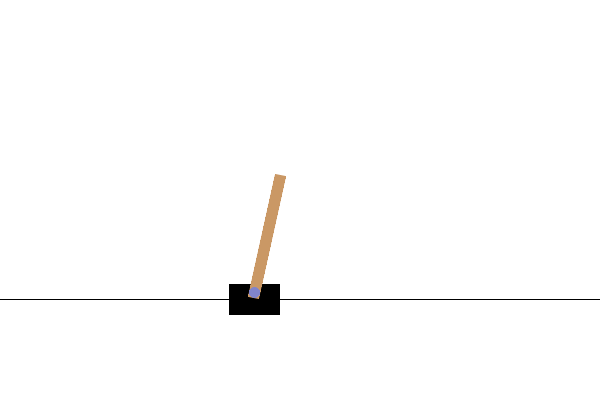

🎯 Q-Learning Agent Balanced for 706 Steps! 🎉


In [21]:
# Test the trained agent
num_test_episodes = 1
delay_per_step = 0.05  # Slow down visualization

for episode in range(1, num_test_episodes + 1):
    frames = []
    state, _ = env.reset()
    state = discretize_state(state)
    done = False
    step_count = 0

    print(f"🚀 Running Q-Learning Agent - Episode {episode}")

    while not done:
        action = np.argmax(q_table[state])  # Choose best action from Q-table
        state, reward, done, truncated, _ = env.step(action)
        state = discretize_state(state)
        step_count += 1

        # Capture and display frame
        frame = env.render()
        frames.append(frame)

        clear_output(wait=True)
        print(f"🧠 Q-Learning Agent | 🔄 Step: {step_count}")
        display(PIL.Image.fromarray(frame))

        time.sleep(delay_per_step)

    print(f"🎯 Q-Learning Agent Balanced for {step_count} Steps! 🎉")
